In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
from snudda.utils.load import SnuddaLoad

In [2]:
external = os.path.join("/media","jofrony","2TB","dardel","current_bgd2",
                        "population_unit", "complete_network", "supercomputer", "networks")

In [3]:
repository = os.path.join("/home","jofrony","Documents","Repositories","current_bgd2", 
                          "population_unit","complete_network","supercomputer","networks")

In [4]:
folder = "connectivity_distance"

In [5]:
e = Experiments()
e.add_repository(repository)
e.add_experiment(name="p0125_p1_p2",
                     color="black",
                     current_injection_file="cell_ids_current_injection_dardel_2022-09-21-13-44-12_p1_p2.json",
                     label="p=0.125",
                     network="network-synapses.hdf5",
                     path=os.path.join(external, "pdc_network_2022-08-31-p0125"),
                     output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-12_p1_p2.hdf5")

e.add_experiment(name="p025_p1_p2",
                 color="blue",
                 current_injection_file="cell_ids_current_injection_dardel_2022-09-21-13-45-26_p1_p2.json",
                 label="p=0.25",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p025"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-45-26_p1_p2.hdf5")

e.add_experiment(name="p05_p1_p2",
                 color="green",
                 current_injection_file="cell_ids_current_injection_dardel_2022-09-21-13-46-40_p1_p2.json",
                 label="p=0.5",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p05"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-40_p1_p2.hdf5")

In [6]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=True)

Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p0125/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-12_p1_p2.hdf5
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p025/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-45-26_p1_p2.hdf5
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p05/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-40_p1_p2.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions


In [7]:
%%time
neuron_type = "dSPN"
result_dictionary = connectivity_distance_analysis(data_obj=sl, pre=["dSPN", "iSPN", "FS"], post=neuron_type, max_post=1000)


CPU times: user 1min 24s, sys: 946 ms, total: 1min 25s
Wall time: 1min 24s


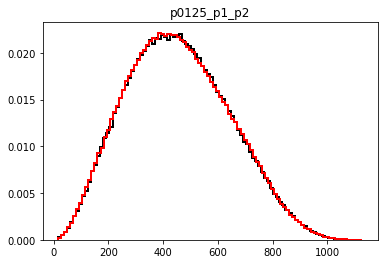

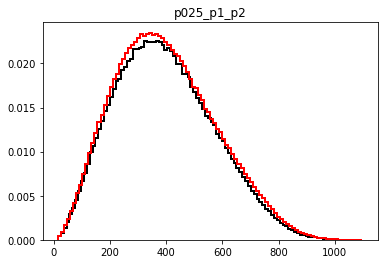

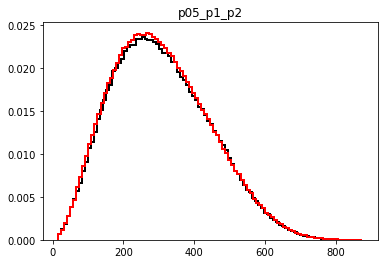

In [8]:
import numpy as np
for e in result_dictionary:
    plt.figure()
    plt.title(e)
    weights = np.ones_like(result_dictionary[e]["within"])/len(result_dictionary[e]["within"])
    plt.hist(np.array(result_dictionary[e]["within"]) * 1e6, bins=100, color="black", histtype=u'step', lw=2, weights=weights)
    weights = np.ones_like(result_dictionary[e]["between"])/len(result_dictionary[e]["between"])
    plt.hist(np.array(result_dictionary[e]["between"]) * 1e6, bins=100, color="red", histtype=u'step', lw=2, weights=weights)
    plt.show()